# Minimal neural network implementation (1/2)

This is a "bare bones" or np-complete (numpy-complete) illustration of
the neural networks for regression.

To begin, let's look at linear functions, which we optimize in least squares linear regression.

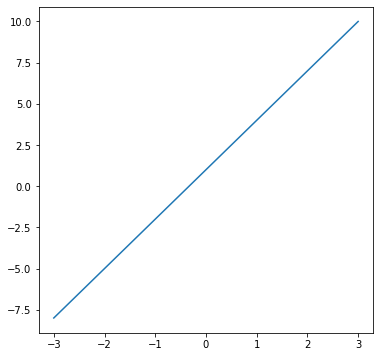

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

x = np.linspace(-3, 3, 100)
num_examples = len(x)
w, b = (3, 1)
y = w*x + b

plt.figure(figsize=(6,6))
plt.plot(x,y)

## One hidden layer

We'll add a single hidden layer with a number of "neurons".

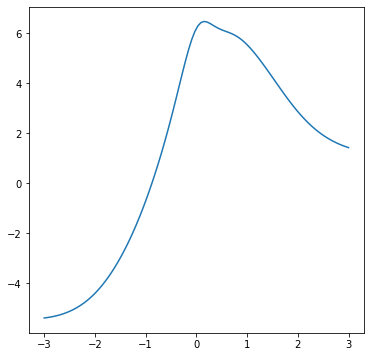

In [3]:
d = 1
H1 = 100
X = np.array(x).reshape(num_examples,d)

W0 = 1*np.random.randn(1,H1)
b0 = np.random.randn(1,H1)
h1 = np.tanh(np.dot(X, W0) + b0)

W1 = np.random.randn(H1, 1)
b1 = np.random.randn(1,1)
y = np.dot(h1,W1) + b1

plt.figure(figsize=(6,6))
_ = plt.plot(x,y)


## Two hidden layers

Let's add another hidden layer.

In [4]:
def relu(x):
    return x*(x>0)

def id(x):
    return x

def sq(x):
    return x*x

def sigmoid(x):
    return 1/(1+np.exp(-x))

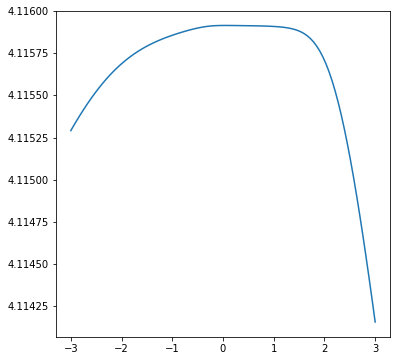

In [5]:
# add a second hidden layer
d=1
H1 = 10
H2 = 5

phi = np.tanh

W0 = 1*np.random.randn(d, H1)
b0 = np.random.randn(d, H1)
h1 = phi(np.dot(X, W0) + b0)

W1 = 1*np.random.randn(H1, H2)
b1 = np.random.normal(1, H2)
h2 = phi(np.dot(h1,W1) + b1)


W2 = np.random.randn(H2, 1)
b2 = np.random.randn(1, 1)
y = np.dot(h2, W2) + b2

plt.figure(figsize=(6,6))
_ = plt.plot(x,y)


## Exercise 1

What happens if we replace the `np.tanh` function by the identity?

## Exercise 2

What happens if we replace the `np.tanh` function by the ReLU? By the sigmoid?

## Exercise 3

Add a third hidden layer! Can you notice any change in the complexity ("wigglyness") of the random functions that are generated? What if you vary the number of neurons in each layer?

## Training the model

We'll now take a regression function and add noise. We'll then fit the function 
using gradient descent, where the gradients are computed using backpropagation.


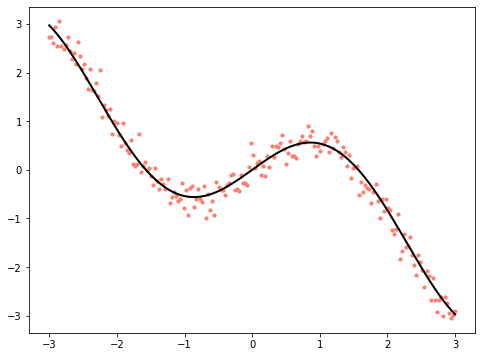

In [ ]:
x = np.linspace(-3, 3, 200)
num_examples = len(x)
w, b = (3,1)
m = x*np.cos(x)
y = m + 0.2*np.random.normal(size=num_examples)

plt.figure(figsize=(8,6))
plt.plot(x,m,color='black',linewidth=2)
plt.scatter(x,y,color='salmon',s=10)


## ReLU

We'll use a rectified linear activation function, defined below

In [ ]:
def relu(x):
    return x*(x>0)

def sq(x):
    return x*x


In [ ]:
# initialize the parameters randomly
W1 = np.random.randn(d,H1)
b1 = np.random.randn(1,H1)
W2 = np.random.randn(H1,1)
b2 = np.random.randn(1,1)
X = np.array(x).reshape(num_examples,d)
Y = y.reshape(num_examples,1)

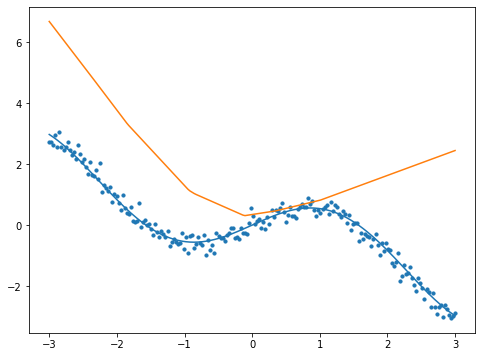

In [ ]:
#Plot the random initialization
hidden_layer = relu(np.dot(X, W1) + b1) # note, ReLU activation
Yhat = np.dot(hidden_layer, W2) + b2

plt.figure(figsize=(8,6))
plt.plot(x,m)
plt.plot(x,Yhat)
plt.scatter(x,Y,s=10)

### Propagate!

Carry out gradient descent with backpropagation


100%|██████████| 100000/100000 [00:08<00:00, 11515.75it/s]


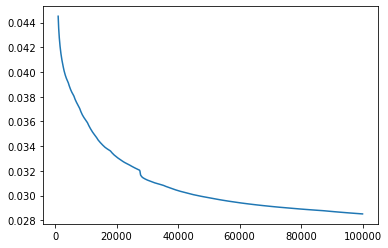

In [ ]:
from tqdm import tqdm

# initialize the parameters randomly
W1 = np.random.randn(d,H1)
b1 = np.random.randn(1,H1)
W2 = np.random.randn(H1,1)
b2 = np.random.randn(1,1)
Y = y.reshape(num_examples,1)

step_size = 1e-2
steps = 100000
loss = []
for i in tqdm(np.arange(steps)):
    
    hidden_layer = relu(np.dot(X, W1) + b1) 
    Yhat = np.dot(hidden_layer, W2) + b2
    current_loss = .5*np.mean((Y-Yhat)**2)
    loss.append(current_loss)

    #if i % 10000 == 0:
    #   print("iteration %d: loss %f" % (i, current_loss))
      
    dloss = Yhat - Y
    dloss /= num_examples

    # backpropate the gradient to the parameters
    # first backprop to parameters W2 and b2
    dW2 = np.dot(hidden_layer.T, dloss)
    db2 = np.sum(dloss)
    
    # next backprop to hidden layer
    dhidden = np.dot(dloss, W2.T)
    # backprop the ReLU non-linearity
    dhidden[hidden_layer <= 0] = 0
    
    # finally backprop to W1,b1
    dW1 = np.dot(X.T, dhidden)
    db1 = np.sum(dhidden)
    
    # perform a parameter update
    W1 += -step_size * dW1
    b1 += -step_size * db1
    W2 += -step_size * dW2
    b2 += -step_size * db2
    
# Plot the loss as a function of gradient step
# skip the first part of the algorithm where the decrease is very steep
skip = 1000
tail_loss = loss[skip:]
plt.plot(np.arange(len(tail_loss))+skip, tail_loss)

## Plot the fitted curve

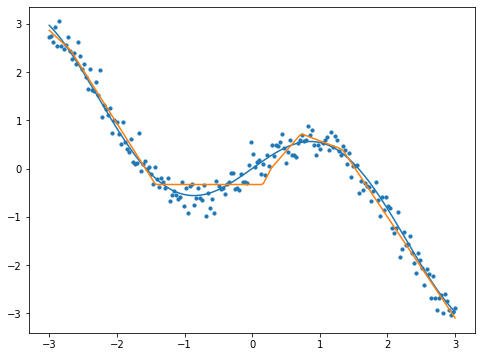

In [ ]:
plt.figure(figsize=(8,6))
plt.plot(x,m)
plt.plot(x,Yhat)
plt.scatter(x,Y,s=10)

## Exercise

What happens if `relu` is replaced by the identity function? By the `tanh` function?
